In [1]:
import pandas as pd
df = pd.read_csv('yelp_2013.csv')
df.head()

/Users/luokui/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/luokui/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


,Unnamed: 0,Unnamed: 0.1,text,stars,date,year
0,4,4,gute lage im stadtzentrum. shoppingmeile und s...,5,2013-11-20,2013
1,7,7,this is a fairly new property i think. it is a...,4,2013-07-07,2013
2,8,8,first time at this group of hotels. pretty new...,4,2013-04-27,2013
3,15,15,had continental style breakfast here a short d...,3,2013-12-07,2013
4,29,29,definitely not a fan. coming from orange count...,2,2013-06-17,2013


In [13]:
#df['text'][0]
cols = ['stars','year']
#df[cols].min(axis=1)
df[cols].describe()

,stars,year
count,468608.000000,468608.0
mean,3.671907,2013.0
std,1.364499,0.0
min,1.000000,2013.0
25%,3.000000,2013.0
50%,4.000000,2013.0
75%,5.000000,2013.0
max,5.000000,2013.0


In [7]:
lens = df.text.str.len()
#lens.means(),lens.std(),lens.max()
import numpy as np
np.mean(lens),np.std(lens),np.max(lens)

(683.7616408597378, 625.4078103577162, 5117)

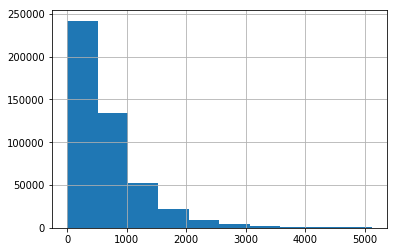

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
lens.hist()

In [21]:
import re,string
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [19]:
re_tok = re.compile(f'[{string.punctuation}""''¨«»®´·º½¾¿¡§£₤‘’]')
def tokenize(s):
    return re_tok.sub(r'\l',s).split()
    #return re_tok.sub(r' \1 ',s).split()

In [22]:
vec = TfidfVectorizer(ngram_range=(1,2),tokenizer=tokenize,
                      min_df=3,max_df=0.9,strip_accents='unicode', use_idf=1,
                      smooth_idf=1, sublinear_tf=1)
td = vec.fit_transform(df['text'])

/Users/luokui/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: bad escape \l
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/luokui/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [81]:
from sklearn.linear_model import  LogisticRegression

In [82]:
def get_mdl(x,y_value):
    y  = y_value
    r = np.log(pr(1,y)/pr(0,y))
    m = LogisticRegression(C=4,dual=True)
    x_nb = np.multiply(x, r)
    re = m.fit(x_nb, y)
    return re,r

In [83]:
re,r = get_mdl(x,y)
np.exp(r)
re.predict_proba(np.multiply(x,r))
preds = np.zeros((len(x),len(y)))
preds
for i,j in enumerate(y):
    print('fit',j)
    preds[:,i] = re.predict_proba(np.multiply(x,r))[:,1]
preds

In [2]:
y = df.stars.values-1

In [2]:
from keras.preprocessing.text import Tokenizer,text_to_word_sequence

/Users/luokui/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/luokui/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/luokui/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/luokui/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
from keras.utils.np_utils import to_categorical

In [5]:
y_ = to_categorical(y,num_classes=5)
y_

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [6]:
x = df.text.values
x[1]

"this is a fairly new property i think. it is a german company and has most of the amenities you would want. it is priced on the budget minded side so it won't break your bank.\nlocation is really good. near the royal mile and waverley station without being too noisy. very easy to walk to everything we wanted to do. has wifi but we did have to re log in every day."

In [7]:
class config:
    def __init__(self):
        self.max_num_words = 30000
        self.embedding_dim = 200
        self.validation_split = 0.1
        self.test_split = 0.1
        self.num_filters = 50
        self.max_len = 512 
        self.batch_size = 100
        self.epochs = 10
confs = config() #整理的括号不能少
confs.epochs

10

In [8]:
max_num_words = 30000
embedding_dim = 200
validation_split = 0.1
test_split = 0.1
num_filters = 50
max_len = 512 
batch_size = 100
epochs = 10

In [9]:
import numpy as np
indices = np.arange(x.shape[0])
np.random.seed(2018)
np.random.shuffle(indices)
x = x[indices]
y_ = y_[indices]
indices

array([459988, 375168,  62158, ..., 342242, 322150, 107770])

In [10]:
nb_validation_sample_val = int((validation_split + test_split)* x.shape[0])
nb_validation_sample_test = int(test_split*x.shape[0])
#nb_validation_sample_test

In [11]:
#t = np.arange(10)t[-3:-1]

In [12]:
x_train = x[:-nb_validation_sample_val]
y_train = y_[:-nb_validation_sample_val]
x_val =  x[-nb_validation_sample_val:-nb_validation_sample_test]
y_val =  y_[-nb_validation_sample_val:-nb_validation_sample_test]
x_test = x[-nb_validation_sample_test:]
y_test = y_[-nb_validation_sample_test:]
# 数据存放在一个列表里，其中 每一句话 就是一个 字符串。

In [13]:
del x
del y
del y_

In [14]:
from keras.preprocessing.sequence import pad_sequences

In [15]:
tokenizer1 = Tokenizer(num_words=max_num_words)
tokenizer1.fit_on_texts(df.text)
vocab = tokenizer1.word_index

In [16]:
x_train_word_ids = tokenizer1.texts_to_sequences(x_train)

In [17]:
x_test_word_ids = tokenizer1.texts_to_sequences(x_test)
x_val_word_ids = tokenizer1.texts_to_sequences(x_val)

In [18]:
len(x_val_word_ids[1])

62

In [19]:
x_train_padded_seqs = pad_sequences(x_train_word_ids,maxlen=max_len)
x_test_padded_seqs = pad_sequences(x_test_word_ids,maxlen=max_len)
x_val_padded_seqs = pad_sequences(x_val_word_ids,maxlen=max_len)

In [20]:
del x_train_word_ids
del x_test_word_ids
del x_val_word_ids

In [21]:
x_val_padded_seqs[:2]


array([[   0,    0,    0, ...,   19,  245,  158],
       [   0,    0,    0, ..., 3491,    1,  567]], dtype=int32)

In [22]:
""" 不起作用啊
def del_data(data_list):
    for i in data_list:
        del i
data_list=['x_train_word_ids','x_test_word_ids','x_val_word_ids']
del_data(data_list)
"""

" 不起作用啊\ndef del_data(data_list):\n    for i in data_list:\n        del i\ndata_list=['x_train_word_ids','x_test_word_ids','x_val_word_ids']\ndel_data(data_list)\n"

In [23]:
def split_data(data,rate=8):
    last = []
    m,n = data.shape
    for i in range(m):
        temp = np.split(data[i],rate)
        a = []
        for j in range(rate):
            s = np.split(temp[j],rate)
            a.append(s)
        last.append(a)
    return last

x_train_padded_seqs_split = split_data(x_train_padded_seqs)
x_test_padded_seqs_split = split_data(x_test_padded_seqs)
x_val_padded_seqs_split = split_data(x_val_padded_seqs)

In [24]:
#type(x_val_padded_seqs_split[0][0][0][0])
#x_val_padded_seqs_split[:100].astype('float32')

In [25]:
"""
del x_train
del x_train_padded_seqs
del x_test
del x_test_padded_seqs
del x_val
del x_val_padded_seqs
"""

'\ndel x_train\ndel x_train_padded_seqs\ndel x_test\ndel x_test_padded_seqs\ndel x_val\ndel x_val_padded_seqs\n'

In [5]:
from keras.layers import GRU,LSTM
from keras.layers import  Embedding,Input,Dense
from keras.models import Model,Sequential
# x_val_padded_seqs_split[:2]

In [106]:
from keras.layers import  TimeDistributed
from keras.callbacks import  ModelCheckpoint

In [123]:
embedding_matrix = np.random.random((max_num_words + 1, embedding_dim))

model = Sequential()

model.add(Embedding(max_num_words + 1,embedding_dim,weights=[embedding_matrix],input_length=int(8),trainable=True))

print_summary(model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_52 (Embedding)     (None, 8, 200)            6000200   
Total params: 6,000,200
Trainable params: 6,000,200
Non-trainable params: 0
_________________________________________________________________


In [192]:
from keras.layers import  Flatten,Reshape

In [198]:
embedding_matrix = np.random.random((max_num_words + 1, embedding_dim))

model = Sequential()

#model.add(Embedding(max_num_words + 1,embedding_dim,weights=[embedding_matrix],input_length=int(8),trainable=True))
model.add(Embedding(max_num_words+1,embedding_dim,input_length=8))
model.add(TimeDistributed(Dense(50),input_shape=(8,)))

model.add(GRU(num_filters,recurrent_activation='sigmoid',activation=None,return_sequences=True))

#"""
#model.add(Reshape((8,8)))
model.add(TimeDistributed(Dense(50),input_shape=(8,8,)))
model.add(GRU(num_filters,recurrent_activation='sigmoid',activation=None,return_sequences=True))

model.add(TimeDistributed(Dense(50),input_shape=(8,8,8,)))
model.add(GRU(num_filters,recurrent_activation='sigmoid',activation=None,return_sequences=False))
#"""
#model.add(Flatten())
model.add(Dense(5,activation='softmax'))
print_summary(model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_107 (Embedding)    (None, 8, 200)            6000200   
_________________________________________________________________
time_distributed_122 (TimeDi (None, 8, 50)             10050     
_________________________________________________________________
gru_150 (GRU)                (None, 8, 50)             15150     
_________________________________________________________________
time_distributed_123 (TimeDi (None, 8, 50)             2550      
_________________________________________________________________
gru_151 (GRU)                (None, 8, 50)             15150     
_________________________________________________________________
time_distributed_124 (TimeDi (None, 8, 50)             2550      
_________________________________________________________________
gru_152 (GRU)                (None, 50)                15150     
__________

In [190]:
from keras.optimizers import Adam
opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['acc'])

"""
savebestmodel = './save_mode/srnn_8_2_yelp2013.h5'
#import os
checkpoint = ModelCheckpoint(savebestmodel,monitor='val_acc',
                            verbose=1, save_best_only=True, mode='max')
callbacks = [checkpoint]
"""


model.fit(np.array(x_train_padded_seqs_split), y_train, validation_data = (np.array(x_val_padded_seqs_split), y_val),
          epochs = 2, batch_size = batch_size,verbose = 1) #,callbacks = callbacks,


#model.fit(np.array(x_train_padded_seqs), y_train, validation_data = (np.array(x_val_padded_seqs), y_val),
   #       epochs = 2, batch_size = batch_size,verbose = 1)

ValueError: Error when checking input: expected embedding_100_input to have 2 dimensions, but got array with shape (374887, 8, 8, 8)

In [113]:
model = Sequential()
model.add(Embedding(max_num_words+1,embedding_dim,input_length=512))
model.add(GRU(num_filters,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(5,activation='softmax'))

from keras.optimizers import Adam
opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['acc'])
print(model.summary())


"""
from keras.callbacks import ModelCheckpoint             
savebestmodel = 'save_model/SRNN(8,2)_yelp2013.h5'
checkpoint = ModelCheckpoint(savebestmodel, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks=[checkpoint] 
"""
             
model.fit(x_train_padded_seqs, y_train, validation_data = (np.array(x_val_padded_seqs), y_val),
          epochs = 2, batch_size = batch_size,callbacks = callbacks,verbose = 1)

#use the best model to evaluate on test set
# from keras.models import load_model
# best_model= load_model(savebestmodel)          
# print(best_model.evaluate(np.array(x_test_padded_seqs),y_test,batch_size=Batch_size))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_46 (Embedding)     (None, 512, 200)          6000200   
_________________________________________________________________
gru_60 (GRU)                 (None, 50)                37650     
_________________________________________________________________
dense_40 (Dense)             (None, 5)                 255       
Total params: 6,038,105
Trainable params: 6,038,105
Non-trainable params: 0
_________________________________________________________________
None
Train on 374887 samples, validate on 46861 samples
Epoch 1/2
   500/374887 [..............................] - ETA: 1:15:55 - loss: 1.6013 - acc: 0.2720

KeyboardInterrupt: 

In [4]:
from keras.layers import  TimeDistributed, Conv2D, Conv1D, GRU
from keras import  Sequential

model = Sequential()
model.add(TimeDistributed(Conv1D(64, 3),input_shape=(250, 299, 3)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_2 (TimeDist (None, 250, 297, 64)      640       
Total params: 640
Trainable params: 640
Non-trainable params: 0
_________________________________________________________________


In [11]:
model = Sequential()
model.add(TimeDistributed(GRU(64),input_shape=(10, 299, 3)))
#model.add(GRU(64), input_shape=(10, 299, 3))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_3 (TimeDist (None, 10, 64)            13056     
Total params: 13,056
Trainable params: 13,056
Non-trainable params: 0
_________________________________________________________________


In [38]:
22 *  64 * 9 - 13056

-384

In [133]:
embedding_matrix = np.random.random((max_num_words+1,embedding_dim))
embedding_layer = Embedding(max_num_words+1,embedding_dim,input_length=max_len/64,
                            weights=[embedding_matrix],trainable=True)


input1 = Input(shape=(8,),dtype='int32')
embed = embedding_layer(input1)
gru1 = GRU(num_filters, recurrent_activation='sigmoid', activation=None,return_sequences=False)(embed)
encoder1 = Model(input1, gru1)
print_summary(encoder1)
print("_______1")

input2 = Input(shape=(8,int(max_len/64),),dtype='int32')
embed2 = TimeDistributed(encoder1)(input2)
gru2 = GRU(num_filters,recurrent_activation='sigmoid',activation=None,return_sequences=False)(embed2)
encoder2 = Model(input2,gru2)
print_summary(encoder2)
print("_______2")

input3 = Input(shape=(8,8,int(max_len/64)), dtype='int32')
embed3 = TimeDistributed(encoder2)(input3)
gru3 = GRU(num_filters,recurrent_activation='sigmoid',activation=None,return_sequences=False)(embed3)
preds = Dense(5, activation='softmax')(gru3)
encoder3 = Model(input3, preds)
print_summary(encoder3)
print("______3")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        (None, 8)                 0         
_________________________________________________________________
embedding_61 (Embedding)     (None, 8.0, 200)          6000200   
_________________________________________________________________
gru_74 (GRU)                 (None, 50)                37650     
Total params: 6,037,850
Trainable params: 6,037,850
Non-trainable params: 0
_________________________________________________________________
_______1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        (None, 8, 8)              0         
_________________________________________________________________
time_distributed_53 (TimeDis (None, 8, 50)             6037850   
_________________________________________________________

In [63]:
"""
x = Input(shape=(12,))  # 就是shape = None,12的np.array
y = Dense(2,activation='softmax')(x)
model = Model(x,y)

opt = keras.optimizers.SGD(lr=0.0001,momentum=0.9,nesterov=False)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['acc'])

tx = np.random.random((10000,12))
ty = np.random.randint(2,size=(10000,1))
ty = to_categorical(ty,num_classes=2)
model.fit(tx,ty,epochs=10)
"""

"\nx = Input(shape=(12,))  # 就是shape = None,12的np.array\ny = Dense(2,activation='softmax')(x)\nmodel = Model(x,y)\n\nopt = keras.optimizers.SGD(lr=0.0001,momentum=0.9,nesterov=False)\nmodel.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['acc'])\n\ntx = np.random.random((10000,12))\nty = np.random.randint(2,size=(10000,1))\nty = to_categorical(ty,num_classes=2)\nmodel.fit(tx,ty,epochs=10)\n"